<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/leson6/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія

## Визначення
Регресія -- це алгоритм **моделювання зв'язку** між залежною числовою ознакою та однією чи декількома залежними ознаками.

Мета лінійної регресії – знайти **лінійний зв’язок** між змінними, який можна використовувати для прогнозування залежної ознаки.

##Типи лінійної регресії
Існує два типи лінійної регресії: **проста** лінійна регресія та **множинна** лінійна регресія. Проста лінійна регресія включає лише одну незалежну змінну, тоді як множинна лінійна регресія включає дві або більше незалежних змінних.

## Проста лінійна регресія


$$y = \beta + \alpha*X $$

де:

* $y$ – залежна змінна
* $X$ – незалежна змінна
* $\beta$ – зсув (intercept)
* $\alpha$ – ваговий множник(нахил, intercept)

In [11]:
# x = np.linspace(0, 10, 500)

# y = 2*x - 1 + np.random.normal(size=x.shape)

# plt.scatter(x, y, label="дані")
# plt.plot([0, 10], [-1, 19], c="red", label="результат моделі")
# plt.xlabel("незалежна ознака x")
# plt.ylabel("залежна ознака y")
# plt.legend()

## Множинна лінійна регресія

$$Y = \beta + \alpha_1*X_1 + \alpha_2*X_2 + \cdots + \alpha_n*X_n$$

де:
* $Y:$ залежна змінна
* $X_1, X_2, X_3, X_4:$ Незалежні змінні
* $\beta:$ зсув (intercept)
* $\alpha_1, \alpha_2, \cdots, \alpha_n:$ коефіцієнти(вагові множники, coefficients)

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

# Приклад 1

Дані про дохід від продажу морозива за день та температуру надворі

[джерело](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue/data?select=IceCreamData.csv)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/IceCreamData.csv")

In [14]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [15]:
df.shape

(500, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [17]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## Точкова діаграма

Text(0, 0.5, 'pevenue')

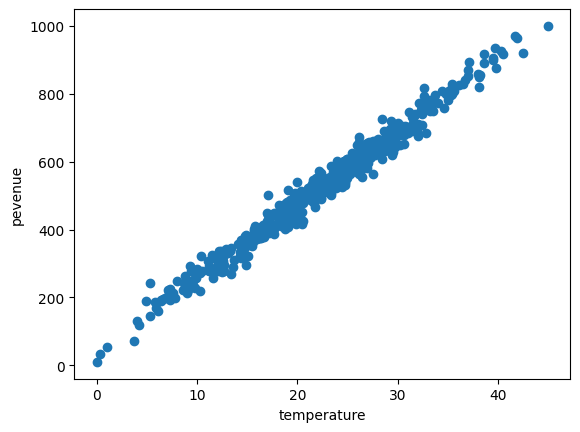

In [18]:
plt.scatter(df['Temperature'], df['Revenue'])
plt.xlabel('temperature')
plt.ylabel('pevenue')

## Тренування моделі

###Поділ даних на залежну та незалежну ознаки

In [19]:
y = df['Revenue']
X = df.drop(columns='Revenue')

### Поділ на тренувальні та тестові дані

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42) # зерно для генератора випадкових чисел

###Модель

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

LinearRegression()

## Результат

In [22]:
model.coef_

array([21.38197386])

In [23]:
model.intercept_

46.804641277423684

<div align="center"><font size='6'> Дохід = 21.4*Температура + 46.8 </font></div>

## Використання

In [24]:
my_temperature = 25

In [25]:
model.predict([[my_temperature]]) # треба передавати 2D масив або таблицю pandas.DataFrame

C:\Users\klimk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([581.35398766])

In [26]:
21.4*my_temperature + 46.8

581.8

##Метрики

Метрики -- це числові характеристики для оцінки ефективності моделі:

* Середнє квадратичне відхилення (MSE)
* Корінь середньоквадратичного відхилення (RMSE).
* Середнє абсолютне відхилення (MAE).
* R² або коефіцієнт детермінації.
* Скоригований R²

### Середня абсолютне відхилення:

MAE — це модуль різниці між цільовим значенням і значенням, передбаченим моделлю.

MAE більш стійие до викидів і не штрафує за помилки так сильно, як mse.

MAE — це лінійна оцінка, яка означає, що всі індивідуальні відмінності зважені однаково.

Він не підходить для задач, де потрібно приділяти більше уваги викидам.

<img src = "https://miro.medium.com/proxy/0*zX9jlpZ8k0CuEpFE.jpg">

### Середнє квадратичне відхилення:

`MSE або середнє квадратичне відхилення` є однією із найбільш частовживаних метрик для завдань регресії.

Це просто середнє значення квадрата різниці між цільовим значенням і значенням, передбаченим регресійною моделлю.

Зводячи різницю в квадрат, він штрафує навіть невелику помилку, яка призводить до переоцінки того, наскільки погана модель.

Дану метрику часто використовують також тому, що вона є диференційованою(пізніше обговоримо).


<img src = "https://miro.medium.com/max/875/0*aTUPK_ILg7-n0znw.jpg">

### Корінь середньо квадратичного відхилення:

RMSE є найбільш широко використовуваною метрикою для задач регресії та є квадратним коренем із середньо квадратичного відхилення між цільовим значенням і значенням, передбаченим моделлю.

У деяких випадках це краще, тому що помилки спочатку зводяться в квадрат перед усередненням, що створює високий штраф за великі помилки.

Це означає, що RMSE є корисним, коли чутливість моделі до великих помилок небажана.

<img src = "https://miro.medium.com/max/650/0*TO7BkvQwtnvVzkK4.png">

### R²

Коефіцієнт детермінації або R² — ще один показник, який використовується для оцінки ефективності регресійної моделі.

Метрика допомагає нам порівнювати наскільки краща наша модель за базову модель, яка завжди прогнозує середнє арифметичне, або медіану.

R² – це безмасштабна оцінка, яка означає, що значення R² завжди буде меншим або дорівнює 1, не має значення, чи є значення занадто великими чи занадто малими.

Значення в 1 означає, що модель хороша, 0 - що така сама як базова

<img src = "https://miro.medium.com/max/783/0*_Bk3m941thWlveS3.png">

### Скоригований R²:

Скоригований R² має те саме значення, що й R², але є його вдосконаленням.

R² страждає від проблеми, пов’язаної з підвищенням значенням при збільшені кількості незалежних ознак, навіть якщо модель не покращується, що може ввести дослідника в оману.

Скоригований R² завжди нижчий за R², оскільки він коригується з урахуванням кількості ознак і показує покращення, лише якщо є реальне покращення.

<img src = "https://miro.medium.com/max/495/0*WkdWEm2993yhYvUA.png">

In [27]:
def mae(y_true, y_pred):
  residual = y_true - y_pred

  return residual.abs().mean()

In [28]:
def mse(y_true, y_pred):
  residual = y_true - y_pred

  return (residual**2).mean()

In [29]:
def rmse(y_true, y_pred):
  return mse(y_true, y_pred) ** 0.5

In [30]:
def r2(y_true, y_pred):
  y_mean = y_true.mean()

  return 1 - mse(y_true, y_pred) / mse(y_true, y_mean)

In [31]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [32]:
y_pred = model.predict(X_test)

In [33]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [34]:
all_metrics

,train,test
MAE,19.70,19.18
RMSE,24.83,25.54
R2,0.98,0.98


# Приклад 2

Дані про ціну діамантів

[джерело]()

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

In [36]:
df.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


![](https://www.datocms-assets.com/25216/1654106726-m-diamond-cut-1125x540.jpg)

In [37]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [38]:
y = df['price']
X = df.drop(columns='price')

In [39]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


## Обробка категоріальних ознак

In [86]:
X = pd.get_dummies(X)
X.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,False,False,True,False,False
1,0.21,False,False,False,True,False
2,0.23,False,True,False,False,False
3,0.29,False,False,False,True,False
4,NaN,False,True,False,False,False


## Тренування моделі

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [88]:
model = LinearRegression()

model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [43]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

In [44]:
all_metrics

,train,test
MAE,990.61,978.80
RMSE,1519.35,1479.16
R2,0.86,0.86


## Коефіцієнти

In [45]:
model.coef_

array([7.86654566e+03, 6.44861707e+14, 6.44861707e+14, 6.44861707e+14,
       6.44861707e+14, 6.44861707e+14])

In [84]:
pd.DataFrame({"coef": model.coef_}, index=X.columns)

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [47]:
model.intercept_

-644861706988589.6

## Покращення

In [48]:
#Будемо шукати лише коефіцієнти, а зсув вважатимемо рівним нулю
model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [49]:
all_metrics["train without intercept"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test without intercept"] = get_metrics(y_test, model.predict(X_test))
all_metrics

,train,test,train without intercept,test without intercept
MAE,990.61,978.80,990.44,978.55
RMSE,1519.35,1479.16,1519.34,1479.06
R2,0.86,0.86,0.86,0.86


In [50]:
pd.DataFrame({"coef": model.coef_}, index=X.columns)

,coef
carat,7865.885520
cut_Fair,-3828.703812
cut_Good,-2737.775074
cut_Ideal,-2064.145855
cut_Premium,-2435.540191
cut_Very Good,-2357.359277


## Сама модель

<div align="center"><font size='6'> Для Fair:     Ціна = 7865*Карат - 3828 </font></div>
<div align="center"><font size='6'> Для Good:      Ціна = 7865*Карат - 2737 </font></div>
<div align="center"><font size='6'> Для Very Good: Ціна = 7865*Карат - 2357 </font></div>
<div align="center"><font size='6'> Для Premium:   Ціна = 7865*Карат - 2435 </font></div>
<div align="center"><font size='6'> Для Ideal:     Ціна = 7865*Карат - 2064 </font></div>




Гранювання |Модель
-----------|---------------------------
Fair       |Ціна = 7865*Карат - 3828
Good       |Ціна = 7865*Карат - 2737
Very Good  |Ціна = 7865*Карат - 2357
Premium    |Ціна = 7865*Карат - 2435
Ideal      |Ціна = 7865*Карат - 2064

## Використання

In [51]:
sample = X.sample(1)
sample

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
29396,0.31,False,False,False,True,False


In [52]:
model.predict(sample)

array([2.88432046])

In [53]:
7865*sample['carat'] - 2064

29396    374.15
Name: carat, dtype: float64

## Проблема

In [54]:
sample = df[['carat', 'cut']].sample(1)
sample

,carat,cut
48381,0.59,Premium


In [55]:
pd.get_dummies(sample)

,carat,cut_Premium
48381,0.59,True


## Рішення

In [56]:
y = df['price']
X = df.drop(columns='price')

In [57]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
encoder = OneHotEncoder(sparse_output=False)
encoder.set_output(transform='pandas')

OneHotEncoder(sparse_output=False)

In [60]:
encoder.fit(X[['cut']])

OneHotEncoder(sparse_output=False)

In [61]:
sample

,carat,cut
48381,0.59,Premium


In [62]:
encoder.transform(sample[['cut']])

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
48381,0.0,0.0,0.0,1.0,0.0


# Приклад 3

Що робити коли є пропущені значення в даних?

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

Штучно добавимо пропущені значення в наші дані

In [64]:
for column in df.columns:
  mask = np.random.binomial(1, 0.05, size=df.shape[0]).astype(bool)
  df.loc[mask, column] = np.nan

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   51243 non-null  float64
 1   cut     51177 non-null  object 
 2   price   51294 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [66]:
df.head()

,carat,cut,price
0,0.23,Ideal,326.0
1,0.21,Premium,326.0
2,0.23,Good,327.0
3,0.29,Premium,334.0
4,NaN,Good,335.0


## Видалення рядків з невідомим значенням у

Видаляємо ті рядки, в яких пропущені значення в стовпчику у(те що наша модель повинна прогнозувати)

In [67]:
df.dropna(subset=['price'], inplace=True)

In [68]:
y = df['price']
X = df.drop(columns='price')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

## Заповнення пропусків

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Для початку нам потрібно отримати назви стовпчиків з числовими та категоріальними ознаками, тому що для них обробка буде відрізнятися

In [71]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

Для числових ознак заповнюємо пропущені значення в кожному стовпчику його медіаною.

В параметр `steps` передаємо список кортежів з двлма значеннями: назва кроку та сам крок(об'єкт який здійснює обробку)

[(назва1, крок1),

 (назва2, крок2),

  ...
  
  ]

In [72]:
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

Для категоріальних ознак застосовуємо наступну обробку:
* заповнюємо пропущені значення в кожному стовпчику значенням, яке найчастіше зустрічається
* застосовуємо кодування OneHotEncoder

In [73]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())])

Об'єднуємо обробку числових і категоріальних ознак в одну

В параметр `transformers` передаємо список кортежів з трьома значеннями: назва трансформера, сам трансформер, назви або індекси стовпчиків до яких це застосовувати

[(назва1, трансформер1, стовпчики1),

 (назва2, трансформер2, стовпчики2),

  ...
  
  ]

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['carat'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['cut'], dtype='object'))])

In [75]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

array([[0.5 , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.36, 0.  , 0.  , 1.  , 0.  , 0.  ],
       [1.24, 0.  , 0.  , 0.  , 1.  , 0.  ],
       ...,
       [0.41, 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.79, 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.01, 0.  , 1.  , 0.  , 0.  , 0.  ]])

Створюємо нову модель

In [76]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

In [77]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

## Використання

In [78]:
sample = pd.DataFrame({'carat': [np.nan], 'cut': [np.nan]})
sample

,carat,cut
0,NaN,NaN


In [79]:
model.predict(sample)

array([3419.])

## Збереження

In [80]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [81]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

#Припущення лінійної регресії
Перш ніж будувати модель лінійної регресії, важливо переконатися, що дані задовольняють певним вимогам або припущенням. Ці припущення включають **лінійність, незалежність, гомоскедастичність** і **нормальність**.



Гомоскедастичність: Дисперсія залишків має бути постійною на всіх рівнях незалежних змінних. Іншими словами, розкид залишків має бути однаковим для всіх прогнозованих значень.
Нормальність: залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а розподіл залишків має нагадувати дзвоноподібну криву.
Відсутність мультиколінеарності: незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

###Лінійність:
Зв’язок між незалежною ознакою y та залежною ознакою(бо ознаками) X має бути лінійним. Іншими словами, кожна ознака X повинна мати досить високий коефіцієнт кореляції Пірсона з ознакою y.

###Відсутність мультиколінеарності:
Незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

In [82]:
corr = df.corr(method="pearson")

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

ValueError: could not convert string to float: 'Ideal'

###Нормальність всіх ознак:
Всі ознаки повинні мати нормальний(або гаусовий) розподіл. Це означає, що їхні гістограми повинні нагадувати симетричну дзвоноподібну криву.

In [ ]:
bins = int(np.sqrt(len(df)))

for column in df.columns:
  if df.dtypes[column] in (int, float):
    df[column].plot(kind="hist", bins=bins)
    plt.title(column)
    plt.show()

###Незалежність залишків:
Залишки (різниця між прогнозованими та фактичними значеннями) мають бути незалежними один від одного. Це означає, що помилка в прогнозуванні однієї точки даних не повинна впливати на помилку в прогнозуванні іншої точки даних.

In [ ]:
res = y_test - y_pred

plt.scatter(range(len(res)), res)
plt.xlabel("номер спостереження")
plt.ylabel("Залишки")
plt.title("Залишки - номер спостереження")

###Однорідність дисперсії(Homoscedasticity):
Стандартне відхилення залишків має бути однаковим для всіх прогнозованих значень.

<img src="https://i.ibb.co/3dJ1Cpj/homoskedasticity.png">

In [ ]:
plt.scatter(y_pred, res)
plt.axhline(0, color="green")
plt.xlabel("спрогнозоване значення")
plt.ylabel("Залишки")
plt.title("Залишки - прогноз")

###Нормальність залишків:
Залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а гістограма залишків має нагадувати симетричну дзвоноподібну криву.

In [ ]:
plt.hist(res, bins=bins)